In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Поблема

В этой лабораторной мы попробуем оценить точность результата вычисления по внешне невинной формуле в арифметике с плавающей запятой. 
Обычно делая арифметические операции мы не задумываемся над точностью результата, однако даже одна операция может значительно ухудшить точность.
Рассмотрим несколько примеров.

Чтобы оценить точность вычислений, нам необходимо знать точный ответ.
Так как мы только хотим проиллюстрировать одну из проблем с потерей точности,
то мы можем сами сконструировать формулу так, чтобы точных ответ был заранее известен.
Мы будем вычислять значение функции, которая эквивалента в точной арифметике тождественному преобразованию, т.е. точный результат вычисления фукнции совпадает с аргументом функции:
$$f(x)=x.$$
Однако в арифметике с плавающей запятой не все свойства арифметических операций верны,
поэтому результат будет получаться с ошибкой.
Мы будем вычислять относительную ошибку по обыкновенной формуле:
$$\sigma(x_0,x)=\frac{|x_0-x|}{|x_0|},$$
где $x_0$ - точное значение, а $x$ - приближенное.


In [2]:
def relative_error(x0, x): return np.abs(x0-x)/np.abs(x0)

Исходные данные нам даны с точностью представления вещественных чисел числами с плавающей запятой, т.е. с половиной машинной точности.
Мы будем проводить вычисления в арифметике двойной точности.

In [3]:
eps=np.finfo(np.double).eps
print("Машинная точность:",eps)

Машинная точность: 2.22044604925e-16


Рассмотрим функцию, выполняющую $n$ делений на число $d$, а затем $n$  умножений на $d$.
Ясно, что в точной арифметике эта функция не должна изменять аргумент.

In [4]:
def f_div_mult(x, d=np.pi, n=52):
    for k in range(n): x=x/d
    for k in range(n): x=x*d
    return x

Создадим набор тестовых значений и проверим точность вычислений на этом наборе.

In [5]:
x0=np.logspace(-4,4,100,dtype=np.double)
x=f_div_mult(x0)
err=relative_error(x0, x)
print("Ошибки",err[:4],"...")

Ошибки [  1.35525272e-16   3.37546384e-16   5.60473876e-16   4.65315259e-16] ...


Гораздо лучше результаты воспринимаются на картинке.
При оценки точности мы всегда выводим относительную ошибку в логарифмической шкале.

In [6]:
print(1<np.inf)

True


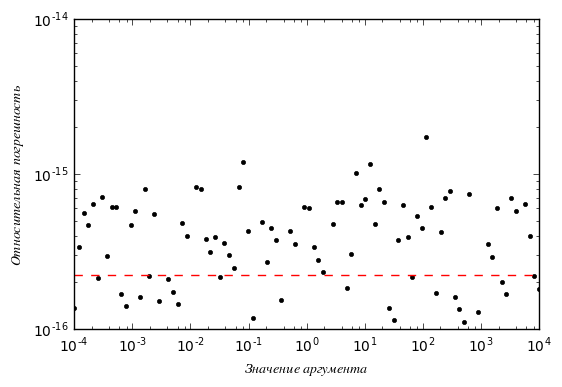

In [7]:
def plot_error(x0,err):
    mask=np.logical_and(err>0,err<np.inf)
    plt.loglog(x0[mask],err[mask],".k")
    plt.loglog(x0,[eps]*len(err),"--r") # машинная точность для сравнения
    plt.xlabel("$Значение\;аргумента$")
    plt.ylabel("$Относительная\;погрешность$")
    plt.show()    
    
plot_error(x0,err)

Мы видим, что погрешность в несколько раз больше машинной точности, обозначенной красной пунктирной линией, однако погрешность остается пренебрежимо малой.
Рассмотрим другую функцию, очень похожу на предыдущую, однако теперь мы будем сначала извлекать корни, а затем возводить результат в квадрат. 

In [8]:
def f_sqrt_sqr(x, n=52):
    for k in range(n): x=np.sqrt(x)
    for k in range(n): x=x*x
    return x

Проведем вычисления и построим график ошибки на том же наборе значений.

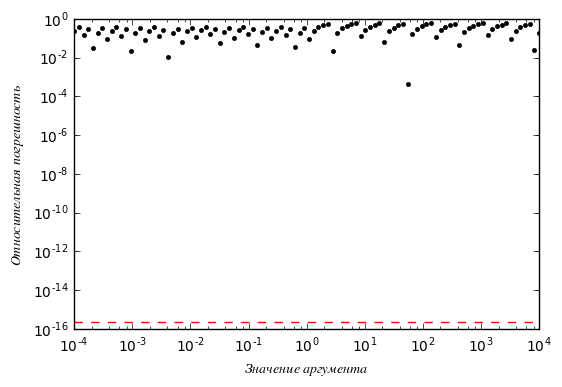

In [9]:
x=f_sqrt_sqr(x0)
err=relative_error(x0, x)
plot_error(x0, err)

Ошибка почти 100%! 
Как такое могло произойти? 
Не возникло исключений, нет сообщений об ошибках, но результат не содержит ни одной верной цифры.

# Задание 

1. Обьясните, чем отличаются два рассмотренных примера, почему настолько отличается точность вычислений.
2. Предложите альтернативный алгоритм вычислений, который будем находить 52 корня из данного числа с такой точностью, что последующее возведение в квадрат 52 раза будет давать близкую к машинной точность.